In [6]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

Read in SQL DataBase

In [7]:
# Create the SQLite engine
engine = create_engine('sqlite:///NAPLAN_SQLDB')

Set up SQL Dataframe

In [8]:
# Execute the SQL query and fetch data into a DataFrame
query = 'SELECT CALENDAR_YEAR, YEAR_LEVEL, DOMAIN, STATE, SUBGROUP, ENROLLED_STUDENTS, MEAN, MEAN_CI, MEAN_SD, NMS, NMS_CI, GAIN, GAIN_CI, EXEMPT, ABSENT, ASSESSED, WITHDRAWN, NONATTEMPT, PARTICIPATION_RATE, PARTICIPATION_NUMBER, NOT_STATED, AVERAGE_AGE, YEARS_OF_SCHOOLING, BANDCOL1, BANDCOL2, BANDCOL3, BANDCOL4, BANDCOL5, BANDCOL6, PCTL05, PCTL20, PCTL80, PCTL95, NOD_MEAN_PREV, NOD_NMS_PREV, NOD_MEAN_BASE, NOD_NMS_BASE FROM naplan_results_clean'
data1 = pd.read_sql_query(query, engine)
data1.head()

CALENDAR_YEAR  YEAR_LEVEL                   DOMAIN STATE  \
0           2008           3  Grammar and Punctuation   ACT   
1           2008           3  Grammar and Punctuation   ACT   
2           2008           3  Grammar and Punctuation   ACT   
3           2008           3  Grammar and Punctuation   ACT   
4           2008           3  Grammar and Punctuation   ACT   

                          SUBGROUP  ENROLLED_STUDENTS   MEAN  MEAN_CI  \
0     Parental Education: Bachelor                167  445.2      NaN   
1  Parental Education: Certificate                 72  396.1      NaN   
2      Parental Education: Diploma                 52  401.4      NaN   
3   Parental Education: Not stated               4009  419.8      NaN   
4                        Non-LBOTE               3852  421.2      6.2   

   MEAN_SD   NMS  ...  BANDCOL5  BANDCOL6  PCTL05  PCTL20  PCTL80  PCTL95  \
0     79.7  95.8  ...      23.4      37.0   308.7   381.3   513.0   565.4   
1     91.0  90.0  ...      15.3      20.3   240.9   319.4   476.6   546.1   
2     69.1  96.9  ...      24.2      12.3   283.7   342.1   456.3   519.2   
3     82.7  93.7  ...      23.5      23.9   278.0   351.0   489.8   551.1   
4     82.5  94.4  ...      23.7      24.6   279.6   352.5   491.1   552.4   

   NOD_MEAN_PREV  NOD_NMS_PREV  NOD_MEAN_BASE  NOD_NMS_BASE  
0           None          None           None          None  
1           None          None           None          None  
2           None          None           None          None  
3           None          None           None          None  
4           None          None           None          None  

[5 rows x 37 columns]

Total Enrolled Students by Year Level between 2008 - 2002(2020 NAPLAN cancelled due to COVID)

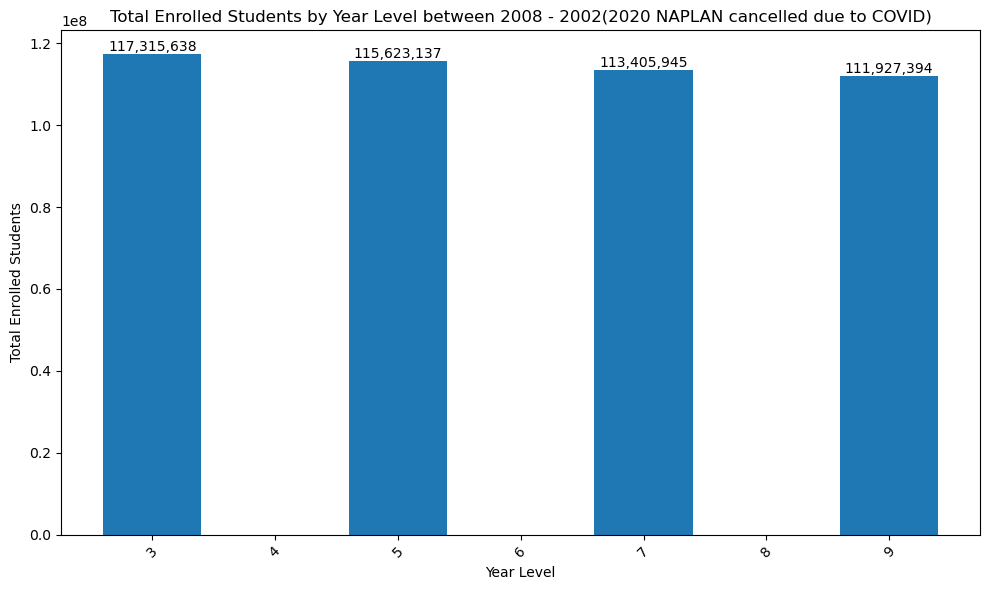

In [9]:
# Group by Year Level to find total enrolled students for each year level
enrolled_by_year_level = data1.groupby(['YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Plot a bar graph showing total enrolled students for each year level
plt.figure(figsize=(10, 6))
bars = plt.bar(enrolled_by_year_level['YEAR_LEVEL'], enrolled_by_year_level['ENROLLED_STUDENTS'])

# Add the total as an annotation above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', va='bottom', ha='center', fontsize=10)

# Calculate the total enrollment
total_enrolled = enrolled_by_year_level['ENROLLED_STUDENTS'].sum()

plt.title('Total Enrolled Students by Year Level between 2008 - 2002(2020 NAPLAN cancelled due to COVID)')
plt.xlabel('Year Level')
plt.ylabel('Total Enrolled Students')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Total Enrolled Students (in Thousands) for each Year Level

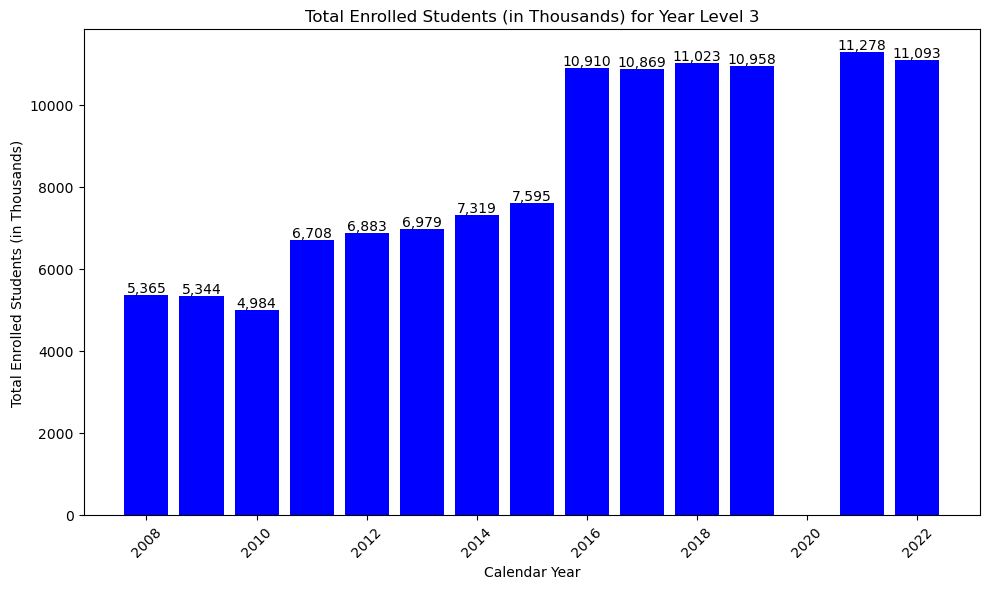

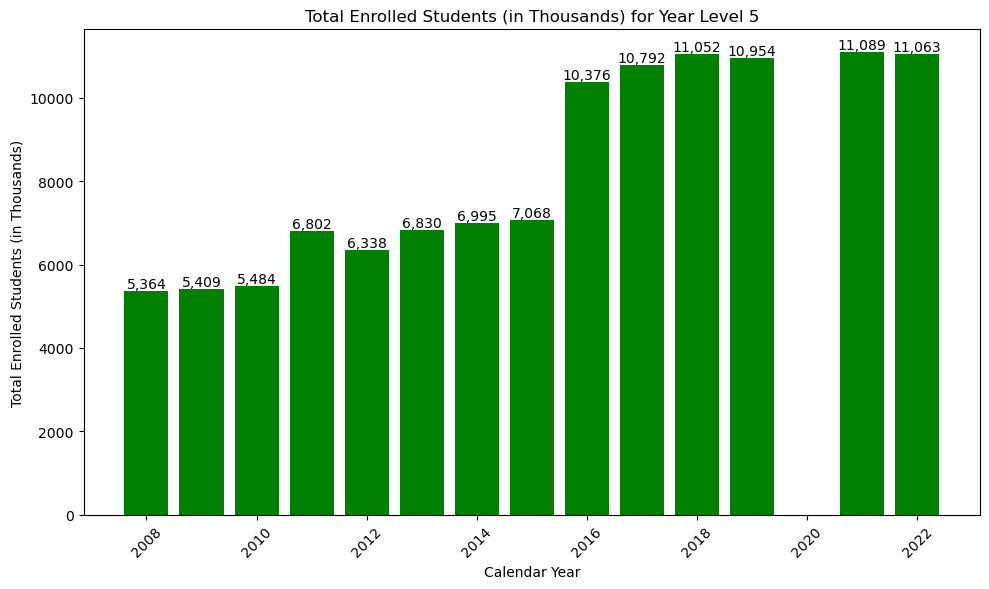

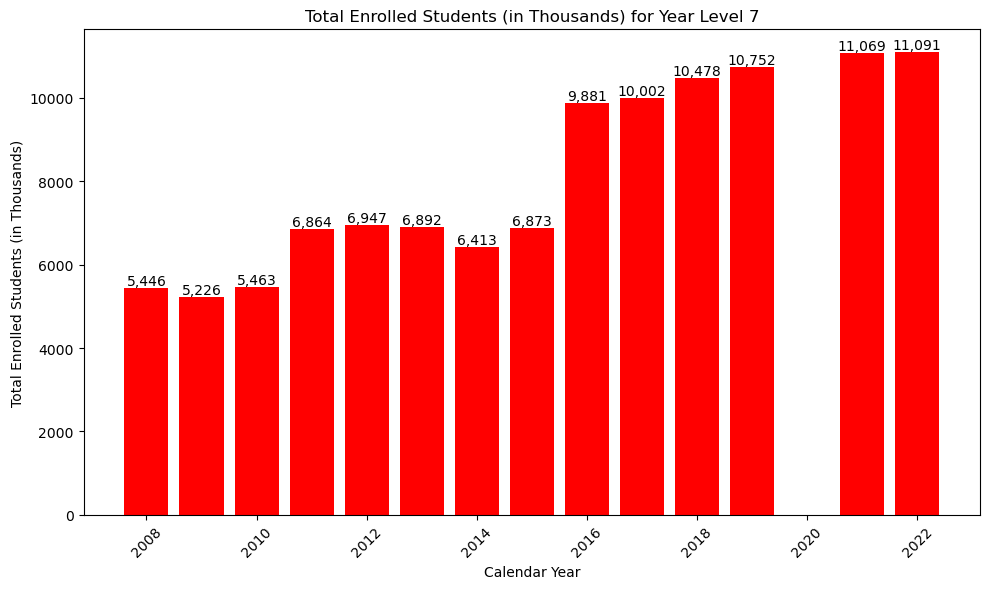

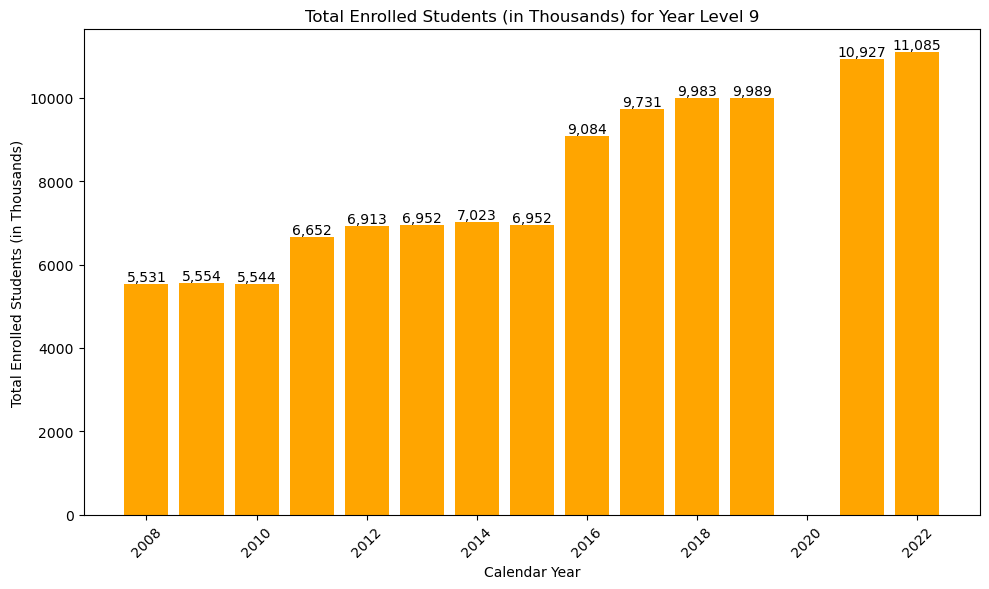

In [10]:
# Group by Calendar Year and Year Level to find total enrolled students
enrolled_by_year_level = data1.groupby(['CALENDAR_YEAR', 'YEAR_LEVEL'])['ENROLLED_STUDENTS'].sum().reset_index()

# Get unique year levels
unique_year_levels = enrolled_by_year_level['YEAR_LEVEL'].unique()

# Define colors for each year level
colors = ['blue', 'green', 'red', 'orange']

# Plot a separate bar graph for each year level
for i, year_level in enumerate(unique_year_levels):
    year_level_data = enrolled_by_year_level[enrolled_by_year_level['YEAR_LEVEL'] == year_level]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(year_level_data['CALENDAR_YEAR'], year_level_data['ENROLLED_STUDENTS'] / 1000, color=colors[i % len(colors)])  # Dividing by 1000
    
    # Annotate each bar with the total enrollment value (in thousands) at the top of the bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', va='bottom', ha='center', fontsize=10)

    plt.title(f'Total Enrolled Students (in Thousands) for Year Level {year_level}')
    plt.xlabel('Calendar Year')
    plt.ylabel('Total Enrolled Students (in Thousands)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


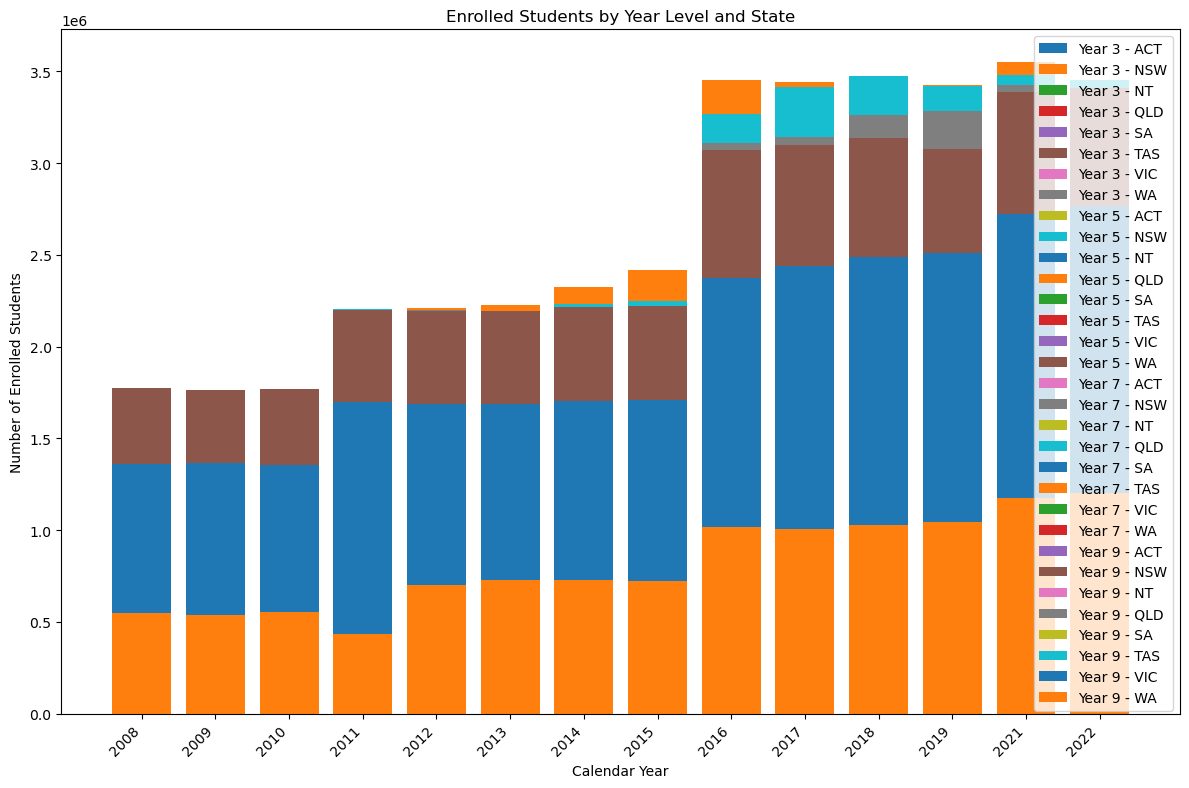

In [42]:
# Group the data by State
data2 = data1.groupby(['CALENDAR_YEAR', 'YEAR_LEVEL', 'STATE'])['ENROLLED_STUDENTS'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 8))

# Loop through each unique year_level-state pair
for year_state, group_data in data2.groupby(['YEAR_LEVEL', 'STATE']):
    year_level, state = year_state
    plt.bar(group_data['CALENDAR_YEAR'].astype(str), group_data['ENROLLED_STUDENTS'], label=f'Year {year_level} - {state}')

plt.xlabel('Calendar Year')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Year Level and State')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()

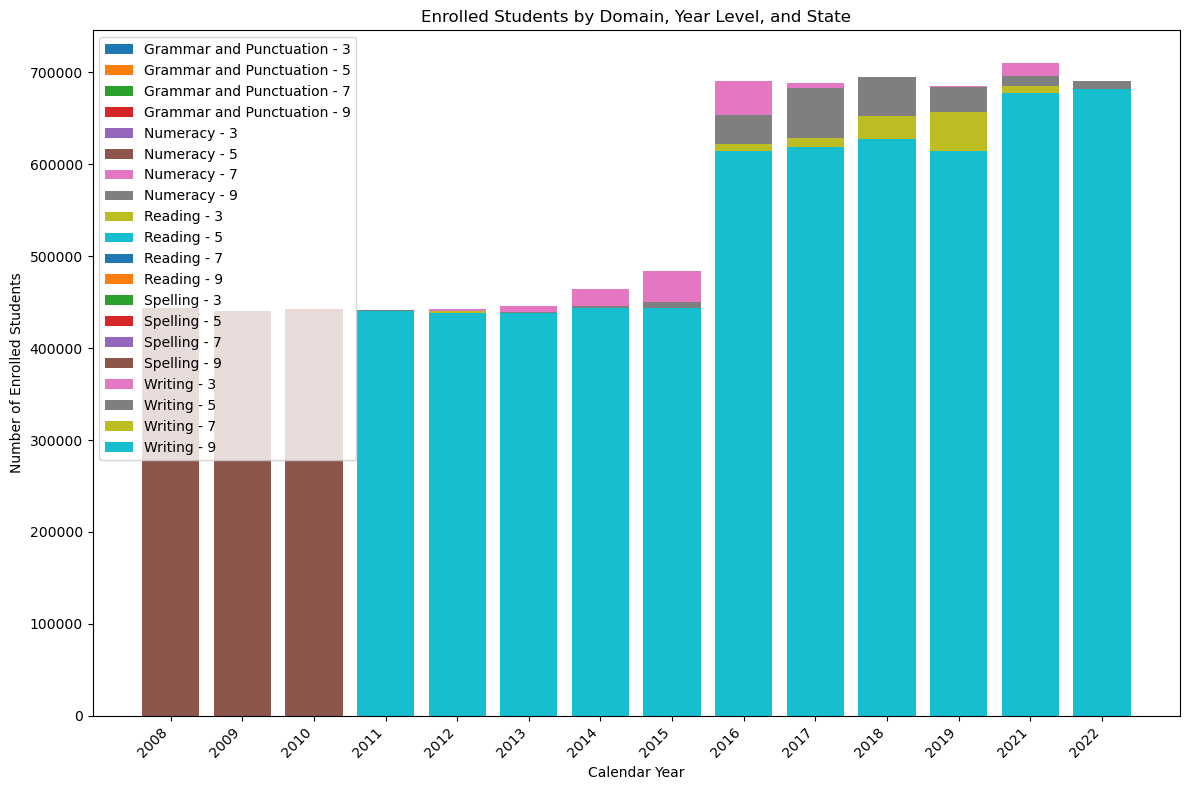

In [43]:
# Group the data
data3 = data1.groupby(['CALENDAR_YEAR', 'DOMAIN', 'YEAR_LEVEL', 'STATE'])['ENROLLED_STUDENTS'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 8))

# Loop through each unique domain-year_level pair
for domain_year, group_data in data3.groupby(['DOMAIN', 'YEAR_LEVEL']):
    domain, year_level = domain_year
    plt.bar(group_data['CALENDAR_YEAR'].astype(str), group_data['ENROLLED_STUDENTS'], label=f'{domain} - {year_level}')

plt.xlabel('Calendar Year')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Domain, Year Level, and State')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the bar chart
plt.show()

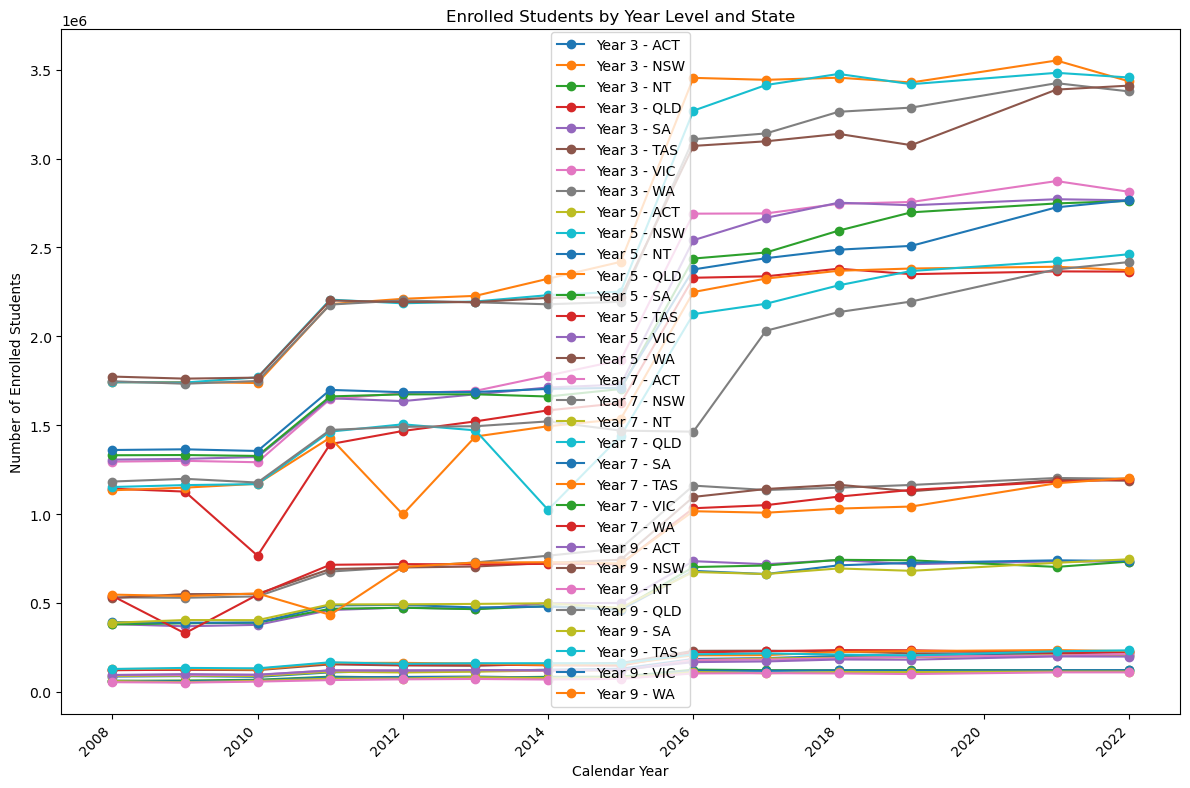

In [44]:
# Group the data by State
data2 = data1.groupby(['CALENDAR_YEAR', 'YEAR_LEVEL', 'STATE'])['ENROLLED_STUDENTS'].sum().reset_index()

# Create a line graph
plt.figure(figsize=(12, 8))

# Loop through each unique year_level-state pair
for year_state, group_data in data2.groupby(['YEAR_LEVEL', 'STATE']):
    year_level, state = year_state
    plt.plot(group_data['CALENDAR_YEAR'], group_data['ENROLLED_STUDENTS'], label=f'Year {year_level} - {state}', marker='o')

plt.xlabel('Calendar Year')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrolled Students by Year Level and State')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the line graph
plt.show()

Cluster learning

In [11]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled = StandardScaler().fit_transform(data1[['PARTICIPATION_RATE', 'PARTICIPATION_NUMBER']])
scaled[0:5]

array([[ 0.75670637, -0.60993165],
       [ 0.42532212, -0.61659443],
       [ 0.65474198, -0.61787028],
       [ 0.59101424, -0.34951614],
       [ 0.59101424, -0.36007735]])

In [13]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(
    scaled,
    columns=['PARTICIPATION_RATE', 'PARTICIPATION_NUMBER'],
    )
# Copy the crypto names from the original data
scaled_df['NMS'] = data1.index

# Set the coinid column as index
scaled_df.set_index('NMS', inplace=True)

# Display sample data
scaled_df.head(5)

PARTICIPATION_RATE  PARTICIPATION_NUMBER
NMS                                          
0              0.756706             -0.609932
1              0.425322             -0.616594
2              0.654742             -0.617870
3              0.591014             -0.349516
4              0.591014             -0.360077

In [14]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
# Create an empty list to store the inertia values
inertia = []

In [15]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_Naplan`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1, n_init='auto')
    k_model.fit(scaled_df)
    inertia.append(k_model.inertia_)

In [16]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

In [17]:
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

k       inertia
0  1  98350.000000
1  2  61158.605473
2  3  30146.692041
3  4  22555.675372
4  5  14839.461885

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [19]:
# Initialise the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1, n_init='auto')

In [20]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_cluster = model.predict(scaled_df)

# Print the resulting array of cluster values.
k_cluster

array([0, 0, 0, ..., 2, 2, 0])

In [22]:
# Create a copy of the DataFrame
copy_predictions = scaled_df.copy()

# Add a new column to the DataFrame with the predicted clusters

copy_predictions['Predicted Clusters'] = k_cluster

In [23]:
# Display sample data
copy_predictions.head(5)

PARTICIPATION_RATE  PARTICIPATION_NUMBER  Predicted Clusters
NMS                                                              
0              0.756706             -0.609932                   0
1              0.425322             -0.616594                   0
2              0.654742             -0.617870                   0
3              0.591014             -0.349516                   0
4              0.591014             -0.360077                   0

In [24]:
copy_predictions.hvplot.scatter(
    x="PARTICIPATION_RATE",
    y="PARTICIPATION_NUMBER",
    by="Predicted Clusters",
    color=["red", "blue", "green", "yellow"],
).opts(yformatter="%.0f")

c:\Users\killb\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [Predicted Clusters]
   :Scatter   [PARTICIPATION_RATE]   (PARTICIPATION_NUMBER)

Scaled data by state and enrolled student participation numbers

In [25]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled = StandardScaler().fit_transform(data1[['PARTICIPATION_RATE', 'PARTICIPATION_NUMBER', 'ENROLLED_STUDENTS']])
scaled[0:5]

array([[ 0.75670637, -0.60993165, -0.61635932],
       [ 0.42532212, -0.61659443, -0.62275713],
       [ 0.65474198, -0.61787028, -0.62410404],
       [ 0.59101424, -0.34951614, -0.35761824],
       [ 0.59101424, -0.36007735, -0.36819147]])

In [26]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(
    scaled,
    columns=['PARTICIPATION_RATE', 'PARTICIPATION_NUMBER', 'ENROLLED_STUDENTS'],
    )
# Copy the crypto names from the original data
scaled_df['STATE'] = data1.index

# Set the coinid column as index
scaled_df.set_index('STATE', inplace=True)

# Display sample data
scaled_df.head(5)


PARTICIPATION_RATE  PARTICIPATION_NUMBER  ENROLLED_STUDENTS
STATE                                                             
0                0.756706             -0.609932          -0.616359
1                0.425322             -0.616594          -0.622757
2                0.654742             -0.617870          -0.624104
3                0.591014             -0.349516          -0.357618
4                0.591014             -0.360077          -0.368191

In [27]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
# Create an empty list to store the inertia values
inertia = []

In [28]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_Naplan`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1, n_init='auto')
    k_model.fit(scaled_df)
    inertia.append(k_model.inertia_)

In [29]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

In [30]:
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

k        inertia
0  1  147525.000000
1  2   74468.338702
2  3   42857.263648
3  4   33908.701308
4  5   20495.835955

In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [32]:
# Initialise the K-Means model using the best value for k
model = KMeans(n_clusters=5, random_state=1, n_init='auto')

In [33]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [34]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_cluster = model.predict(scaled_df)

In [35]:
# Print the resulting array of cluster values.
k_cluster


array([0, 0, 0, ..., 3, 2, 0])

In [36]:
# Create a copy of the DataFrame
copy_predictions = scaled_df.copy()


In [37]:
# Add a new column to the DataFrame with the predicted clusters

copy_predictions['Predicted Clusters'] = k_cluster


In [38]:

copy_predictions.hvplot.scatter(
    x="PARTICIPATION_RATE",
    y="PARTICIPATION_NUMBER",
    by="Predicted Clusters",
    color=["red", "blue", "green", "orange", "yellow"],
).opts(yformatter="%.0f")

c:\Users\killb\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [Predicted Clusters]
   :Scatter   [PARTICIPATION_RATE]   (PARTICIPATION_NUMBER)